In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [8]:
df.dropna(subset ='Embarked', axis =0, inplace=True)

In [9]:
mean = df['Age'].mean()
df['Age'].fillna(mean, inplace= True)

C:\Users\santosh\AppData\Local\Temp\ipykernel_12124\2158091761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean, inplace= True)


In [10]:
df['Cabin'].aggregate(NaN=lambda x: x.isna().sum(), NotNan=lambda x: x.notna().sum())

NaN       687
NotNan    202
Name: Cabin, dtype: int64

In [11]:
df['Cabin'].fillna('Unknown', inplace=True)

C:\Users\santosh\AppData\Local\Temp\ipykernel_12124\876187935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)


In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
pd.get_dummies(df['Sex'],dtype =int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [14]:
sex  = pd.get_dummies(df['Sex'], drop_first=True, dtype = int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [15]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
embark  = pd.get_dummies(df['Embarked'], drop_first=False, dtype = int)
embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [17]:
df.drop('Embarked', axis =1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148


In [18]:
df = pd.concat([ df, sex, embark], axis =1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.642093,1,2,W./C. 6607,23.4500,Unknown,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,1,0,0


In [19]:
df.drop(['Embarked', 'Sex','Name', 'Ticket', 'Cabin','PassengerId'], axis =1, inplace=True)

In [20]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [21]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'C', 'Q',
       'S'],
      dtype='object')

In [22]:
scaler = StandardScaler()
# Fit and transform the data
standardized_data = scaler.fit_transform(df)

pd.DataFrame(standardized_data,columns=df.columns).head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,-0.786961,0.825209,-0.589620,0.431350,-0.474326,-0.500240,0.735342,-0.482711,-0.307941,0.616794
1,1.270711,-1.572211,0.644848,0.431350,-0.474326,0.788947,-1.359911,2.071634,-0.307941,-1.621287
2,1.270711,0.825209,-0.281003,-0.475199,-0.474326,-0.486650,-1.359911,-0.482711,-0.307941,0.616794
3,1.270711,-1.572211,0.413385,0.431350,-0.474326,0.422861,-1.359911,-0.482711,-0.307941,0.616794
4,-0.786961,0.825209,0.413385,-0.475199,-0.474326,-0.484133,0.735342,-0.482711,-0.307941,0.616794


In [23]:
X = df.drop('Survived', axis =1)
y = df['Survived']

In [24]:
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
logistic = LogisticRegression()

In [27]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Our model is {accuracy*100:.3f} % accurate.')

Our model is 77.528 % accurate.


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



In [31]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64

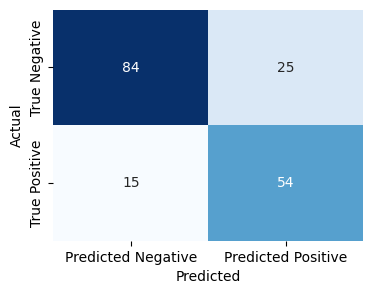

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


 Here analyzing above confusion matrix
- TN = 88; 88 negative examples were correctly predicted as negative
- FP = 21; 21 negative examples were incorrectly predicted as positive
- FN = 17; 17 positive examples were incorrectly predicted as negative
- TP = 52; 52 positive examples were correctly predicted as positive.

In [33]:
print(f'precision score of our model {precision_score(y_test, y_pred):.4f}')

precision score of our model 0.6835


As we can see, Among the people our classifier has positively predicited of survived people, only 68% people have actually survived.

In [34]:
print(f'Recall score of our model {recall_score(y_test,y_pred):.4f}')

Recall score of our model 0.7826


In [35]:
f1_score(y_test, y_pred)

0.7297297297297297

# hyper parameters

In [36]:
hyperparameter = {
    "penalty":['l1','l2'],
    "solver":['liblinear'],
    "class_weight":[None,'balanced'],
    "max_iter":[50,100,200,500]
}

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
model = LogisticRegression()

In [39]:
grid_search  = GridSearchCV(estimator=model, param_grid=hyperparameter, cv=3)

In [40]:

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_iter': [50, 100, 200, 500],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [41]:

grid_search.best_params_

{'class_weight': None, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}

In [42]:
grid_search.best_score_

0.790436005625879

In [43]:
from sklearn.metrics import f1_score, make_scorer, confusion_matrix
f1_scorer = make_scorer(f1_score)
f1_scorer

make_scorer(f1_score, response_method='predict')

In [44]:

grid_search  = GridSearchCV(estimator=model, param_grid=hyperparameter, cv=3, scoring=f1_scorer)

In [45]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_iter': [50, 100, 200, 500],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring=make_scorer(f1_score, response_method='predict'))

In [46]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_iter': 50,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [47]:
grid_search.best_score_

0.7287739121815839

In [48]:

model.set_params(**grid_search.best_params_)

LogisticRegression(class_weight='balanced', max_iter=50, penalty='l1',
                   solver='liblinear')

In [49]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [50]:
logistic.score(X_test, y_test)


0.7752808988764045

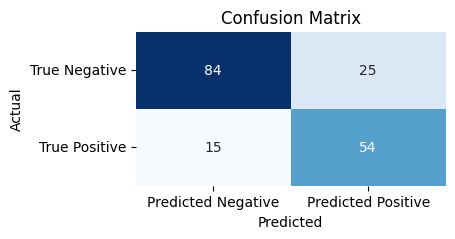

In [51]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_matrix(y_test, logistic.predict(X_test)), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()